In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('./ML/data/Telco_churn.csv')

🔍 Matriz de confusión entre cluster y churn real:
[[3756 1407]
 [1756  113]]

🔍 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      5163
           1       0.07      0.06      0.07      1869

    accuracy                           0.55      7032
   macro avg       0.38      0.39      0.39      7032
weighted avg       0.52      0.55      0.53      7032



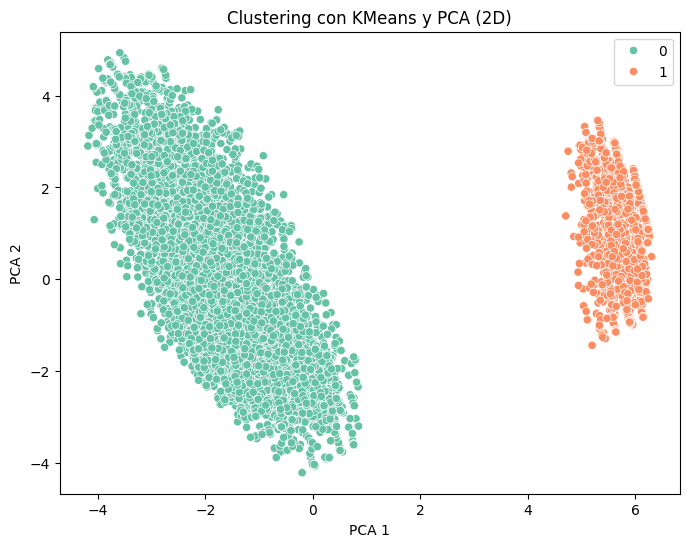

In [3]:
# 1. Cargar y limpiar datos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df.drop(['customerID'], axis=1, inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. Codificar variables categóricas
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Separar características y variable objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# 4. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Aplicar KMeans con 2 clusters (se asume que churn sí/no son 2 grupos)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Evaluar qué tan bien los clusters separan churn
print("🔍 Matriz de confusión entre cluster y churn real:")
print(confusion_matrix(y, clusters))

print("\n🔍 Reporte de clasificación:")
print(classification_report(y, clusters))

# 7. Visualización opcional con reducción de dimensionalidad
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2')
plt.title('Clustering con KMeans y PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [4]:
df['cluster'] = clusters
print(df.groupby('cluster')['Churn'].value_counts(normalize=True))

cluster  Churn
0        0        0.681422
         1        0.318578
1        0        0.925658
         1        0.074342
Name: proportion, dtype: float64


In [5]:
df['cluster'] = clusters

In [6]:
df.groupby('cluster').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.197750,32.905479,76.855053,2729.505406,0.318578,0.503447,0.482583,0.265239,0.876633,0.123367,...,0.0,0.490385,0.0,0.495464,0.201197,0.190856,0.675435,0.215893,0.406930,0.157656
1,0.034211,30.667763,21.076283,665.220329,0.074342,0.509211,0.482237,0.419079,1.000000,0.000000,...,1.0,0.000000,1.0,0.000000,0.238816,0.416447,0.292763,0.217763,0.080263,0.483553


📌 Primeras observaciones clave:
Variable	Cluster 0	Cluster 1	Comentario
Churn	31.9%	7.4%	Cluster 0 → mayor riesgo de churn
MonthlyCharges	76.86	21.08	Cluster 0 paga mucho más
TotalCharges	2729.51	665.22	Clientes en Cluster 0 han pagado mucho más históricamente
tenure	32.9 meses	30.7 meses	Antigüedad similar (ligeramente mayor en Cluster 0)
SeniorCitizen	19.8%	3.4%	Más adultos mayores en el Cluster 0

📞 Servicios contratados
Variable	Cluster 0	Cluster 1	Comentario
PhoneService_Yes	87.7%	100%	Todos en Cluster 1 tienen servicio telefónico
StreamingTV_Yes	49.0%	0.0%	Solo Cluster 0 tiene streaming
StreamingMovies_Yes	49.5%	0.0%	Igual que arriba
MultipleLines (proxy)	Más líneas	Solo una línea en Cluster 1	

Cluster 1 parece estar formado por clientes muy básicos, que no contratan servicios adicionales como streaming o líneas múltiples.

💳 Facturación y contrato
Variable	Cluster 0	Cluster 1	Comentario
PaperlessBilling_Yes	67.5%	29.3%	Más facturación digital en Cluster 0
Contract_Two year	19.1%	41.6%	Clientes del Cluster 1 están más atados por contrato largo
PaymentMethod_Electronic check	40.7%	8.0%	El método de pago más riesgoso está en Cluster 0
PaymentMethod_Mailed check	15.8%	48.3%	Clientes de Cluster 1 pagan por cheque, más tradicional

🎯 Interpretación general
Cluster	Perfil	Riesgo de Churn	Características principales
0	Cliente moderno, digital y con muchos servicios	Alto (31.9%)	Paga más, usa streaming, electrónico, tiene múltiples líneas
1	Cliente tradicional, básico	Bajo (7.4%)	Plan básico, contrato largo, sin servicios extra, paga por cheque

📌 ¿Qué puedes hacer?
Cluster 0: foco en campañas de retención. Son clientes valiosos (pagan más), pero con alto riesgo.

Cluster 1: posiblemente menos rentables, pero estables. Buena base de usuarios.

Aunque es posible que negocio retuviera clientes valiosos, no creo que este modelo esté enfocando el verdadero problema puesto que no sabe diferenciar bien los churns aunque si diferencia bien que los clientes que suelen irse son los que tienen los cargos mensuales y totales muchos mas altos. Si le interesa a negocio podría segmentar por gasto de cliente y hacer una campaña sobre esto. NO retiene directamente al cliente pero si indirectamente.